## DeepWalk algorithm with Karate

In [11]:
## import libraries
import seaborn as sns
import torch
import networkx as nx

# graph library
from karateclub import DeepWalk
from karateclub import Node2Vec
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [3]:
sns.set_style("darkgrid")

### loading the dataset

Number of nodes (club-members) 34


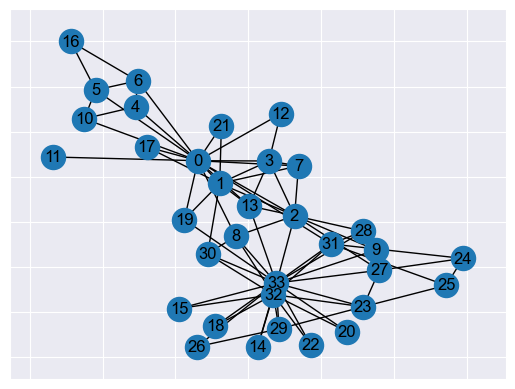

In [4]:
# loading the dataset
G = nx.karate_club_graph()
print("Number of nodes (club-members)", len(G.nodes))
nx.draw_networkx(G)

In [10]:
G.nodes[i]

{'club': 'Officer'}

### Plot the graph with labels

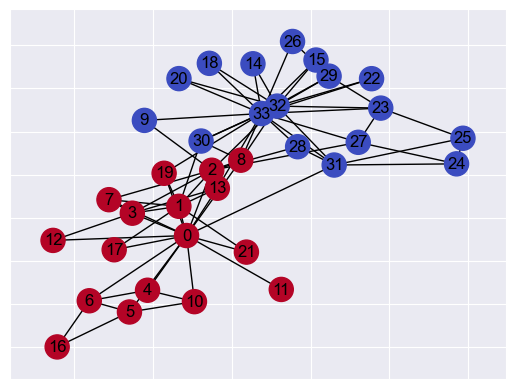

In [8]:
labels = []
for i in G.nodes:
    club_names = G.nodes[i]['club']
    labels.append(1 if club_names == 'Mr. Hi' else club_names== 0) # 1=officers or Mr. Hi
    
layout_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos = layout_pos, node_color = labels, cmap = 'coolwarm')

## Perform node embedding using Deepwalk

In [12]:
Deepwalk_model = DeepWalk(walk_number =10, walk_length=80, dimensions=124)
Deepwalk_model.fit(G)
embedding = Deepwalk_model.get_embedding()
print('Embedding array shape (node x features):', embedding.shape)

Embedding array shape (node x features): (34, 124)


## Low Dimensional plot of the nodes x features

Low dimension embedding representation (nodes x 2): (34, 2)


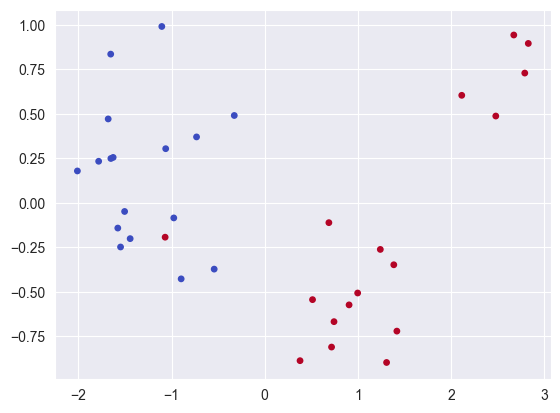

In [15]:
PCA_model = sklearn.decomposition.PCA(n_components=2)
lowdimension_embedding = PCA_model.fit_transform(embedding)
print('Low dimension embedding representation (nodes x 2):', lowdimension_embedding.shape)
plt.scatter(lowdimension_embedding[:, 0], lowdimension_embedding[:, 1], c=labels,
           s=15,
           cmap='coolwarm')

## Node classification using embedding nodes


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

x_train, x_test, y_train, y_test = train_test_split(embedding, labels, test_size =0.3)
ML_model = LogisticRegression(random_state=20).fit(x_train, y_train)
y_predict = ML_model.predict(x_test)
ML_acc = roc_auc_score(y_test, y_predict)

print("AUC:", ML_acc)

AUC: 1.0
